<a href="https://colab.research.google.com/github/YuriFerreira03/Trabalho-PDI/blob/main/PDI_Trabalho_1_Yuri_Ferreira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Extração de Região de Interesse (ROI)

Crie uma função chamada crop(). Essa função receberá por parâmetro uma imagem, uma posição x, y e uma altura e largura. A função deverá retornar o pedaço recortado.

Suponha a imagem abaixo, que chamaremos de messiImg.

<img src="https://i.stack.imgur.com/6QscS.jpg"/>

Se sua função for chamada assim:

x_bola = 336
y_bola = 287
largura_bola = 163
altura_bola = 49
ballImg = crop(messiImg, x_bola, y_bola, largura_bola, altura_bola)

Ao final, ballImg deve conter apenas a imagem da bola.

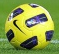


Agora você criará uma função que "cola" uma imagem menor em uma imagem maior.

Crie uma função chamada paste() que receberá, como parâmetro, uma imagem src (source), uma imagem dst (destiny) e uma posição x, y qualquer. Ela retornará a imagem modificada.

A imagem dst será "colada" na posição x, y da imagem src. Confira o exemplo abaixo.

newImg = paste(messiImg, ballImg, x, y)

É assim que ficará a imagem "newImg" (de acordo com a posição x e y)

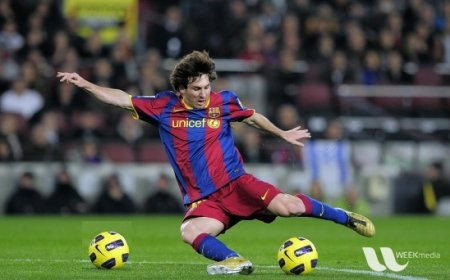

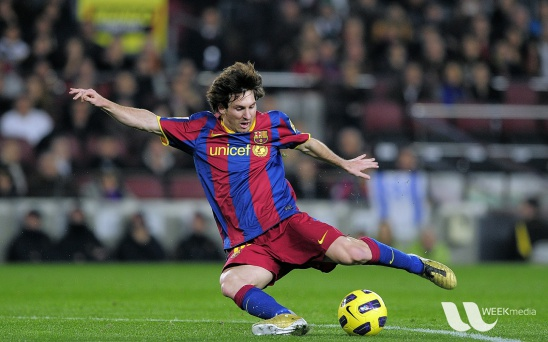

334 160


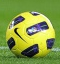

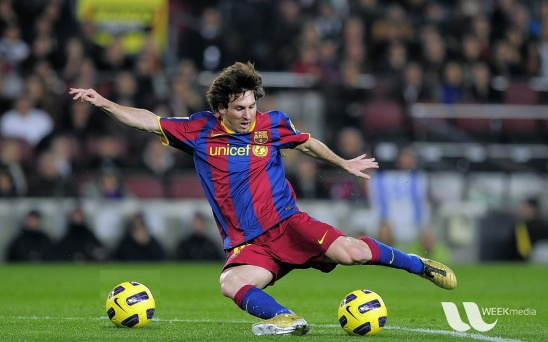

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def crop (img, x, y, h, w):
    crop_img = img[y:y+h, x:x+w]
    return crop_img


def paste(src, dst, x, y):
    (m, n, c) = dst.shape
    final1 = m+x
    final2 = n+y
    print (final1, final2)
    src[x:final1, y:final2] = dst
    return src;


img = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/messi_ex1.jpg")

cv2_imshow(img)
result_crop = crop (img, 332, 278, 163, 60)
result_paste = paste(img, result_crop, 270, 100)
cv2_imshow(result_crop)
cv2_imshow(result_paste)

#2. Trabalhando com Canais de Cores

Crie um algoritmo para saber qual imagem é mais "vermelha", "verde" ou "azul".

Para isso, você deverá pegar uma imagem qualquer e extrair cada um dos canais dela, em separado. Assim, você irá gerar 3 novas imagens, uma contendo apenas o canal vermelho, outra contendo somente o verde e a última, azul.

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/RGB_channels_separation.png"/>

A seguir, você tirará a média de cores da imagem (somar os tons de todos os pixels e dividir pelo total de pixels). Se a imagem do canal vermelho tiver a maior média, então a imagem é mais "vermelha" e assim por diante!

Imagem Original


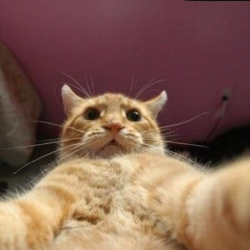


A imagem é mais vermelha



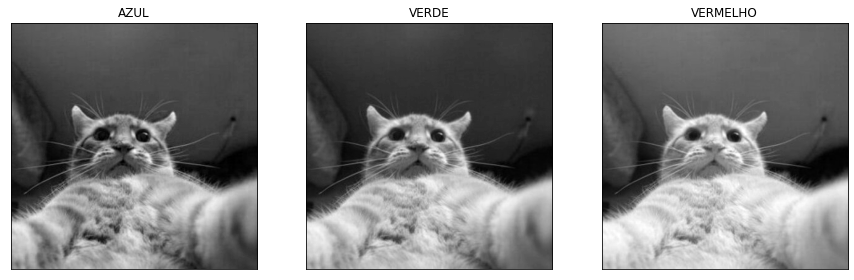

In [ ]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt
from skimage.transform import resize

def maior(blue, green, red):
    if(blue > green):
        if(blue > red):
            return "\nA imagem é mais azul\n"
        else:
            return "\nA imagem é mais vermelha\n"
    elif(green > red):
        return "\nA imagem é mais verde\n"
    else:
        return "\nA imagem é mais vermelha\n"

cat = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/Gato_ex2.jpeg")
res = cv2.resize(cat, (250, 250))
print('Imagem Original')
cv2_imshow(res)
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
altura, largura, _ = cat.shape

r, g, b = cv2.split(cat)

plt.figure(figsize=(15,15))

plt.subplot(1, 3, 1), plt.imshow(b, cmap="gray"), plt.title("AZUL"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(g, cmap="gray"), plt.title("VERDE"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(r, cmap="gray"), plt.title("VERMELHO"), plt.xticks([]), plt.yticks([])
blue  = 0
green = 0
red   = 0

for y in range(altura):
    for x in range(largura):
        blue  += cat.item(y, x, 2)
        green += cat.item(y, x, 1)
        red   += cat.item(y, x, 0)

blue  = blue/(altura*largura)
green = green/(altura*largura)
red   = red/(altura*largura)

print(maior(blue, green, red))

plt.show()

# 3. Junte pessoas usando Alpha Blending

No vídeo abaixo é feito uma "brincadeira" misturando o rosto de dois políticos brasileiros que antagonizam. A técnica utilizada é de transparência por alpha blending. 

<a href="https://www.youtube.com/watch?v=_NRIjiFnYlM"><img src="https://img.youtube.com/vi/_NRIjiFnYlM/mqdefault.jpg"/></a>

Agora é a sua vez! Pegue duas fotos (se você se sentir a vontade, pode ser uma sua e de um amigo que concorde) e crie uma versão híbrida de vocês.

Angela Been


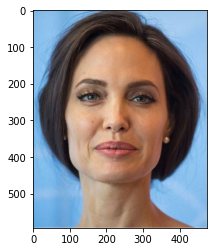

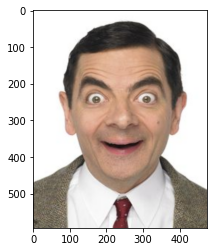

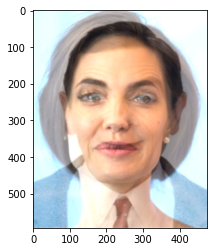

In [38]:
import cv2
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt

Ang = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/Ang_exer3.jpg")
Ang = cv2.cvtColor(Ang, cv2.COLOR_BGR2RGB)
Been = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/Been_exer3.jpg")
Been = cv2.cvtColor(Been, cv2.COLOR_BGR2RGB)
h, w, _ = Ang.shape
Been = cv2.resize(Been, (w, h))

AngelaBeen= cv2.addWeighted(Ang, 0.8, Been, 0.5, 0)
AngelaBeen = cv2.GaussianBlur(AngelaBeen,(5,5),0)

plt.imshow(Ang)
plt.figure()
plt.imshow(Been)
plt.figure()
print ('Angela Been')
plt.imshow(AngelaBeen)

#4. Histograma de Cores

Nos vídeos abaixo, é discutido o tema de histograma de cores em imagens digitais.

<a href="https://www.youtube.com/watch?v=ioa_mFB_nFg"><img src="https://img.youtube.com/vi/ioa_mFB_nFg/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=83RZSK1j8Ak"><img src="https://img.youtube.com/vi/83RZSK1j8Ak/mqdefault.jpg"/></a>

Nesse exercício, quero que você selecione 2 imagens distintas entre si. Uma deve ser preto e branco e a outra colorida.

Plote (desenhe o gráfico) dos seus histogramas na tela via Python e OpenCV.

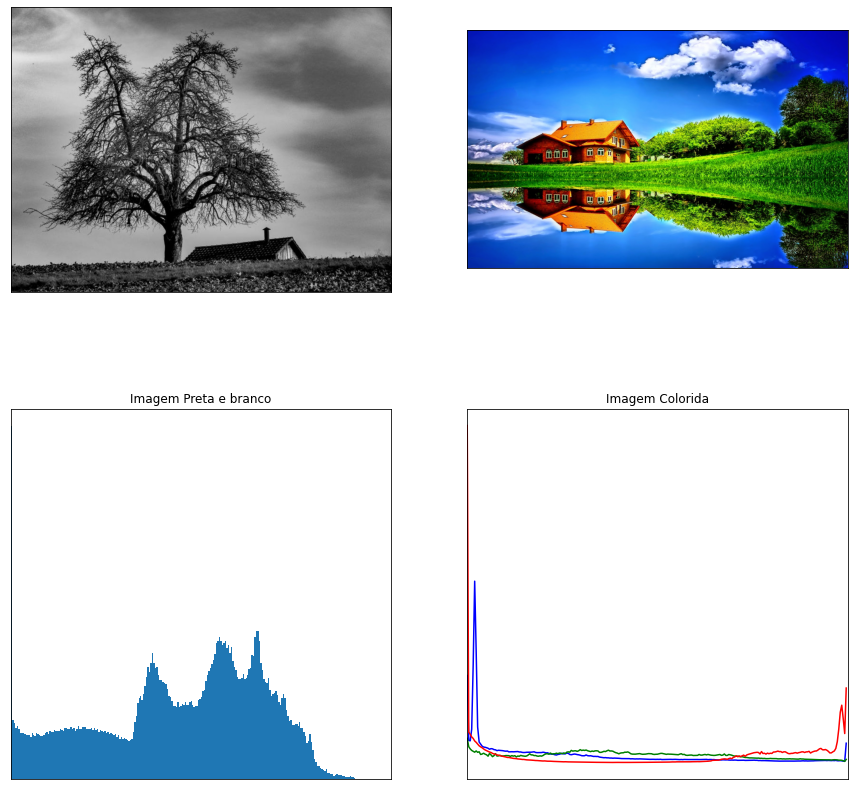

In [ ]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

pb = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/ImgPB_exer4.jpg")
cl = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/ImgColorida_exer4.jpg")
cl = cv2.cvtColor(cl, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1), plt.imshow(pb, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.hist(pb.ravel(), 256, [0, 256]), plt.title("Imagem Preta e branco"), plt.xlim([0, 256]), plt.xticks([]), plt.yticks([])

cores = ('b', 'g', 'r')

plt.subplot(2, 2, 2), plt.imshow(cl), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.title("Imagem Colorida"), plt.xticks([]), plt.yticks([])

for i, col in enumerate(cores):
    histograma = cv2.calcHist([cl], [i], None, [256], [0, 256])
    plt.plot(histograma, color = col), plt.xlim([0, 256])

plt.show()

#5. Adição de Imagens

No vídeo abaixo, é apresentada uma maneira de se fazer adição de imagens (inserir uma imagem menor dentro de uma imagem maior), podendo inclusive combinar esse efeito com a transparência.

<a href="https://www.youtube.com/watch?v=60k962jJAmE"><img src="https://img.youtube.com/vi/60k962jJAmE/mqdefault.jpg"/></a>

Dito isso, faça um algoritmo que receba uma imagem e insira uma marca d'água sobre essa figura. Considere a imagem abaixo como referência.

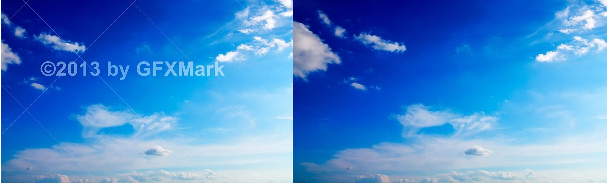

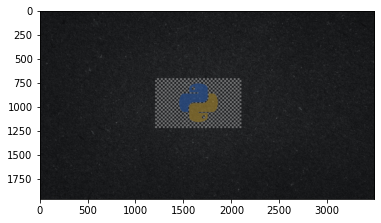

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def addBlendingEffect(firstImage, secondImage, weight):
    firstImageGray = cv2.cvtColor(firstImage, cv2.COLOR_BGR2GRAY)
    secondImageGray = cv2.cvtColor(secondImage, cv2.COLOR_BGR2GRAY)

    mask = firstImageGray - secondImageGray
    ret, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY)

    copyImg = firstImage.copy()
    altura, largura, = mask.shape
    for y in range(0, altura):
        for x in range(0, largura):
            if mask.item(y, x) == 255:
                blendingPixelBlue = firstImage.item(y, x, 0) * (1.0 - weight) + secondImage.item(y, x, 0) * weight
                blendingPixelGreen = firstImage.item(y, x, 1) * (1.0 - weight) + secondImage.item(y, x, 1) * weight
                blendingPixelRed = firstImage.item(y, x, 2) * (1.0 - weight) + secondImage.item(y, x, 2) * weight

                copyImg.itemset((y, x, 0), blendingPixelBlue)
                copyImg.itemset((y, x, 1), blendingPixelGreen)
                copyImg.itemset((y, x, 2), blendingPixelRed)

    return copyImg

def memeGeneratorWithBlending(background, foreground):
    finalImage = addImageOverlay(background, foreground,1200, 700)
    finalImage = addBlendingEffect(background, finalImage, 0.4)
    
    plt.imshow(finalImage)

tl = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/TelaPreta_exer5.jpg")
pynb = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/Python_exer5.jpg")
tl = cv2.cvtColor(tl, cv2.COLOR_BGR2RGB)
pynb = cv2.cvtColor(pynb, cv2.COLOR_BGR2RGB)
memeGeneratorWithBlending(tl,pynb)

#6. Equalização de histograma

Utilizando a ideia dessa página, crie um algoritmo que faça a equalização de histograma da imagem abaixo, a fim de melhorar seu contraste. 

Sugestão: <a href="https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html">siga este tutorial</a>.

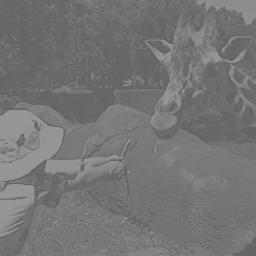

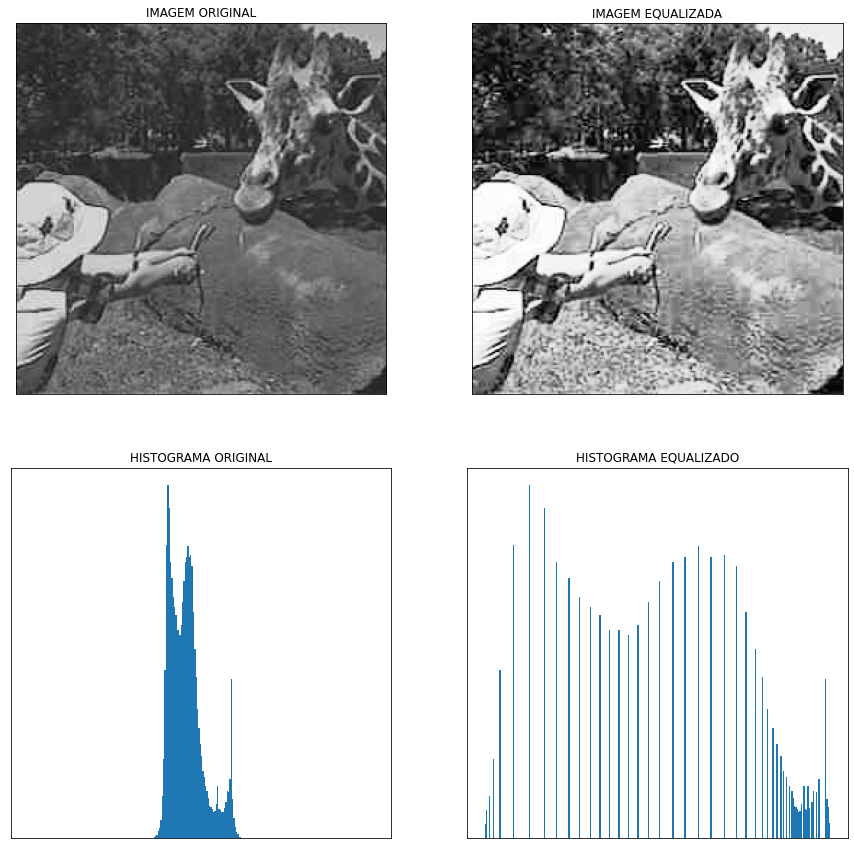

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 

tigre = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/Girafa_exer6.png", 0)
eqHist = cv2.equalizeHist(tigre)
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1), plt.imshow(tigre, cmap="gray"), plt.title("IMAGEM ORIGINAL"), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(eqHist, cmap="gray"), plt.title("IMAGEM EQUALIZADA"), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.hist(tigre.ravel(), 256, [0, 256]), plt.title("HISTOGRAMA ORIGINAL"), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.hist(eqHist.ravel(), 256, [0, 256]), plt.title("HISTOGRAMA EQUALIZADO"), plt.xticks([]), plt.yticks([])

plt.show()

#7. Meu primeiro buscador de imagens!

[Um jeito muito simples de verificar se uma imagem é igual a outra  é por meio de comparação entre histogramas](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html). 

Dito isso, você deverá fazer o seguinte:

* Crie uma pasta contendo ao menos 5 imagens, das quais duas precisam ser muito similares em seu conteúdo visual (mas não idênticas). Para facilitar, vamos chamar as imagens muito parecidas de S1 e S2. As imagens restantes que são diferentes, serão D1, D2 e D3.
* Faça uma função que receba as imagens S1 e compare ela com S2, D1, D2 e D3 pelo histograma. 
* Compare a distância de S1 para cada imagem considerando as métricas da Correlação, Chi-Square e Bhattacharrya. 
* Para cada imagem, some as três distâncias ao quadrado e aplique a raiz quadrada: sqrt(Corr^2 + Chi-Sq^2 + Bhatta^2)
* Retorne a imagem mais parecida com S1 (o par que tiver a menor distância)

COMPARAÇÃO S1 E S1 - VALORES PARA IMAGENS 100% IGUAIS.
Correlação : 1.0
Chi-Square:  0.0
Bhattacharrya:  0.0

COMPARAÇÃO S1 E S2
Correlação:  0.22075695330521064
Chi-Square:  4835.694039441424
Bhattacharrya:  0.7421013339487106
RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO: 4835.694101423015

COMPARAÇÃO S1 E D1
Correlação:  0.027492964370527045
Chi-Square:  7277.907713080067
Bhattacharrya:  0.808482687617084
RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO: 7277.907758038051

COMPARAÇÃO S1 E D2
Correlação:  0.020441441016550058
Chi-Square:  1208.3608293464122
Bhattacharrya:  0.8099691197135436
RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO: 1208.3611009820602

COMPARAÇÃO S1 E D3
Correlação:  -0.004735782683713881
Chi-Square:  1047.7881251238116
Bhattacharrya:  0.8768641021632078
RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO: 1047.7884920457723

A IMAGEM MAIS PARECIDA COM S1 É:


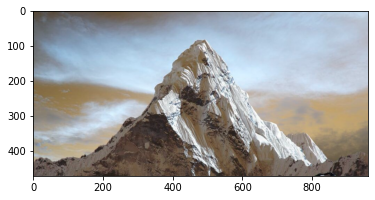

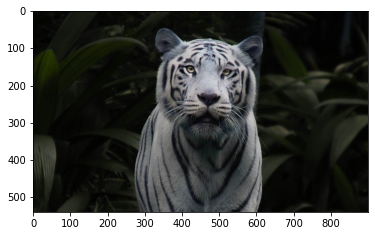

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import *

def compare_histograma (hsv_S1, hsv_img):
  h_bins = 50
  s_bins = 60
  histSize = [h_bins, s_bins]
  h_ranges = [0, 180]
  s_ranges = [0, 256]
  ranges = h_ranges + s_ranges 
  channels = [0, 1]
  hist_S1 = cv2.calcHist([hsv_S1], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_S1, hist_S1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
  hist_img = cv2.calcHist([hsv_img], channels, None, histSize, ranges, accumulate=False)
  cv2.normalize(hist_img, hist_img, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
  s1_img = np.zeros(4)
  for compare_method in range(4):
    s1_img[compare_method] = cv2.compareHist(hist_S1, hist_img, compare_method)
  
  return s1_img;

def Operation(compareHist):
  return sqrt((compareHist[0]*compareHist[0])+(compareHist[1]*compareHist[1])+(compareHist[3]*compareHist[3]))

def compareDistancias(menor_Distancia):
  return menor_Distancia.min()

s1 = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/Mte1_exer7.jpg")
s2 = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/Mte2_exer7.jpg")
d1 = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/im3_exer7.png")
d2 = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/im4_exer7.jpg")
d3 = cv2.imread("/content/drive/MyDrive/TrabalhoPDI/im5_exer7.jpg")
hsvS1 = cv2.cvtColor(s1, cv2.COLOR_BGR2HSV)
hsvS2 = cv2.cvtColor(s2, cv2.COLOR_BGR2HSV)
hsvD1 = cv2.cvtColor(d1, cv2.COLOR_BGR2HSV)
hsvD2 = cv2.cvtColor(d2, cv2.COLOR_BGR2HSV)
hsvD3 = cv2.cvtColor(d3, cv2.COLOR_BGR2HSV)

compare_s1_s1 = compare_histograma(s1, s1)
print("COMPARAÇÃO S1 E S1 - VALORES PARA IMAGENS 100% IGUAIS.")
print("Correlação :", compare_s1_s1[0])
print("Chi-Square: ", compare_s1_s1[1])
print("Bhattacharrya: ", compare_s1_s1[3])
print("")

compare_s1_s2 = compare_histograma(s1, s2)
print("COMPARAÇÃO S1 E S2")
print("Correlação: ", compare_s1_s2[0])
print("Chi-Square: ", compare_s1_s2[1])
print("Bhattacharrya: ", compare_s1_s2[3])
print("RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO:", Operation(compare_s1_s2))
print("")

compare_s1_d1 = compare_histograma(s1, d1)
print("COMPARAÇÃO S1 E D1")
print("Correlação: ", compare_s1_d1[0])
print("Chi-Square: ", compare_s1_d1[1])
print("Bhattacharrya: ", compare_s1_d1[3])
print("RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO:", Operation(compare_s1_d1))
print("")

compare_s1_d2 = compare_histograma(s1, d2)
print("COMPARAÇÃO S1 E D2")
print("Correlação: ", compare_s1_d2[0])
print("Chi-Square: ", compare_s1_d2[1])
print("Bhattacharrya: ", compare_s1_d2[3])
print("RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO:", Operation(compare_s1_d2))
print("")

compare_s1_d3 = compare_histograma(s1, d3)
print("COMPARAÇÃO S1 E D3")
print("Correlação: ", compare_s1_d3[0])
print("Chi-Square: ", compare_s1_d3[1])
print("Bhattacharrya: ", compare_s1_d3[3])
print("RAIZ DAS SOMAS DAS DISTANCIAS AO QUADRADO:", Operation(compare_s1_d3))
print("")

menor_Distancia = np.zeros(4)
menor_Distancia[0] = Operation(compare_s1_s2)
menor_Distancia[1] = Operation(compare_s1_d1)
menor_Distancia[2] = Operation(compare_s1_d2)
menor_Distancia[3] = Operation(compare_s1_d3)
print("A IMAGEM MAIS PARECIDA COM S1 É:")

imgsParecidas = compareDistancias(menor_Distancia)

plt.imshow(s1)
plt.figure()

if(imgsParecidas == menor_Distancia[0]):
  plt.imshow(s2)
elif (imgsParecidas == menor_Distancia[1]):
  plt.imshow(d1)
elif (imgsParecidas == menor_Distancia[2]):
  plt.imshow(d2)
else:
  plt.imshow(d3)


#8. Rastreamento (Tracking)

Quando falamos do rastreamento de um objeto, estamos nos referindo a uma aplicação que "acompanha" o movimento de um objeto em um vídeo, marcando a posição dele tipicamente em caixas envolventes. Abaixo tem-se um exemplo:

<img src="https://i.pinimg.com/originals/41/36/f9/4136f909c378936cdf33f2cd975d081c.gif"/>

Nesse exercício, implemente o rastreio de um objeto com uma cor definida, nos moldes do exemplo do vídeo abaixo.

<a href="https://www.youtube.com/watch?v=M2wcIsMXPEA"><img src="https://img.youtube.com/vi/M2wcIsMXPEA/mqdefault.jpg"/></a>

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

video = cv2.VideoCapture(0) #abre a captura de camera
points = []

while(True):
    _, frame = video.read()
    hsvFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower = np.array([45, 100, 50])
    upper = np.array([100, 255, 255])

    mask = cv2.inRange(hsvFrame, lower, upper) #identifica a area do objeto

    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    if contours: #se enxitir contornos
        i = 0
        maxArea = cv2.contourArea(contours[0])
        idContourMaxArea = 0
        for c in contours:
            if maxArea < cv2.contourArea(c):
                maxArea = cv2.contourArea(c)
                idContourMaxArea = i
            i += 1
        x, y, w, h = cv2.boundingRect(contours[idContourMaxArea])

        if cv2.contourArea(contours[idContourMaxArea]) > 50:
            points.append((int(w/2+x), int(h/2+y)))

        if len(points) > 1:
            for i in range(1, len(points)):
                cv2.line(frame, points[i], points[i-1], (255,255,0), i)

        if len(points) > 20:
            points.pop(0)

        if(maxArea > 100.0):
            cv2.circle(frame, (int(x+(w/2)+1), int(y+(h/2)+1)), int(h/2), (0, 0, 255), 3)
            cv2.drawContours(frame, [contours[idContourMaxArea]], 0, (0, 255, 0), 3)

    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()

#9. Limiarização de Imagens

Nos vídeos abaixo, é discutido o tema de limiarização de imagens.

<a href="https://www.youtube.com/watch?v=P2R7Nn1_VwQ"><img src="https://img.youtube.com/vi/P2R7Nn1_VwQ/mqdefault.jpg"/></a>

<a href="https://www.youtube.com/watch?v=onI2lQ0V0pc"><img src="https://img.youtube.com/vi/onI2lQ0V0pc/mqdefault.jpg"/></a>

Nesse exercício, quero que você construa um limiarizador com um trackbar (barra) que permite ajuste dinâmico do limiar. Considere o vídeo abaixo para saber como construir.

<a href="https://www.youtube.com/watch?v=OTiy8knQjJs"><img src="https://img.youtube.com/vi/OTiy8knQjJs/mqdefault.jpg"/></a>

In [ ]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt 

def onChange(value):  
    pass

imagem = cv2.imread("D:\Desktop\Exerc8PDI/Python.jpg", 0)
copia = imagem.copy()

title = "Limiarização de Imagens com trackbar"
cv2.namedWindow(title)

cv2.createTrackbar("limiar", title, 0, 255, onChange)

valor_inicial = 0
alterar = False

while(True):
    valor_atual = cv2.getTrackbarPos("limiar", title)

    if valor_inicial != valor_atual:
        alterar = True
        valor_inicial = valor_atual

    if alterar == True:
        limiar, copia = cv2.threshold(imagem, valor_atual, 255, cv2.THRESH_BINARY)
        alterar = False

    cv2.imshow(title, copia)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

#10. Filtragem

Considere os seguintes filtros:

*   Filtro da Média
*   Filtro Gaussiano
*   Filtro da Mediana
*   Filtro Sobel
*   Filtro Laplaciano

Crie uma função que receba uma imagem e o nome do filtro. Essa função deve retornar a imagem com o filtro aplicado. 

A seguir, apresente todas as imagens com os filtros aplicados em um grid. Use os subplots conforme apresentados no vídeo abaixo:
<a href="https://www.youtube.com/watch?v=U35qns3LvvI"><img src="https://img.youtube.com/vi/U35qns3LvvI/mqdefault.jpg"/></a>


Referências:
<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html">Link 1</a> e <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html">Link 2</a>.

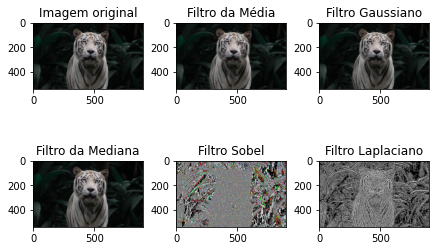

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def filtragem (img,filtro):
	if (filtro == "Filtro da Média"):
		imgFiltrada = cv2.blur(img,(5,5))
	elif (filtro == "Filtro Gaussiano"):
		imgFiltrada = cv2.GaussianBlur(img,(5,5),0)
	elif (filtro == "Filtro da Mediana"):
		imgFiltrada = cv2.medianBlur(img,5)
	elif (filtro == "Filtro Sobel"):
		imgFiltrada = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
	elif (filtro == "Filtro Laplaciano"):
		img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
		imgFiltrada = cv2.Laplacian(img,cv2.CV_64F)
	return imgFiltrada

def showImage(img):
    imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(imgMPLIB)
    plt.show()

def showImageGrid(img, title):
    fig, axis = plt.subplots()
    imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axis.imshow(imgMPLIB)
    axis.set_title(title)
    plt.show()

def showMultipleImageGrid(imgsArray, titlesArray, x, y):
    if(x < 1 or y < 1):
        print("ERRO")
        return
    elif(x == 1 and y == 1):
        showImageGrid(imgsArray, titlesArray)
    elif(x == 1):
        fig, axis = plt.subplots(y)
        fig.suptitle(titlesArray)
        yId = 0
        for img in imgsArray:
            imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axis[yId].imshow(imgMPLIB)

            yId += 1
    elif(y == 1):
        fig, axis = plt.subplots(1, x)
        fig.suptitle(titlesArray)
        xId = 0
        for img in imgsArray:
             imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axis[xId].imshow(imgMPLIB)

        xId += 1
    else:
        fig, axis = plt.subplots(y, x)
        xId, yId, titleId = 0, 0, 0
        for img in imgsArray:
            imgMPLIB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axis[yId, xId].set_title(titlesArray[titleId])
            axis[yId, xId].imshow(imgMPLIB)
            if(len(titlesArray[titleId]) == 0):
                axis[yId, xId].axis('off')

            titleId += 1
            xId += 1
            if xId == x:
                xId = 0
                yId += 1

        fig.tight_layout(pad=0.5)
    plt.show()
    

img = cv2.imread('/content/drive/MyDrive/TrabalhoPDI/im5_exer7.jpg')


title=["Imagem original","Filtro da Média","Filtro Gaussiano","Filtro da Mediana","Filtro Sobel","Filtro Laplaciano"]

img1=filtragem(img,title[1])
img2=filtragem(img,title[2])
img3=filtragem(img,title[3])
img4=filtragem(img,title[4])
img5=filtragem(img,title[5])

img1= img1.astype('uint8')
img2= img2.astype('uint8')
img3= img3.astype('uint8')
img4= img4.astype('uint8')
img5= img5.astype('uint8')

vetImg=[img,img1, img2, img3, img4,img5]
showMultipleImageGrid(vetImg,title,int(3),int(2))